In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import datetime
import pandas 
import dateutil.parser as parser

In [ ]:
#First i have cleaned activity and connection data by removing missing values and then converted timestamp to YMD format
#

In [2]:
def dateparse (time_in_secs):
    if time_in_secs == 'null':
        return 0
    else:
        _time=datetime.datetime.fromtimestamp(float(time_in_secs))
        return _time.strftime('%Y-%m-%d')
    
    
connection_data = pandas.read_csv('E:/IU/Sem4/Network Science/Project/connection.csv',parse_dates=[2], date_parser=dateparse)
activity_data = pandas.read_csv('E:/IU/Sem4/Network Science/Project/facebook-links.csv',parse_dates=[2], date_parser=dateparse)

In [38]:
import numpy as np

connection_data['year'] = connection_data['Timestamp'].dt.year
connection_data['month'] = connection_data['Timestamp'].dt.month
activity_data['year'] = connection_data['Timestamp'].dt.year
activity_data['month'] = connection_data['Timestamp'].dt.month

new_data=connection_data[(connection_data['year'] == 2008)]


In [4]:
graph=nx.Graph()

for i in connection_data.index:
    graph.add_edge(connection_data.loc[i]["Source"],connection_data.loc[i]["Target"])

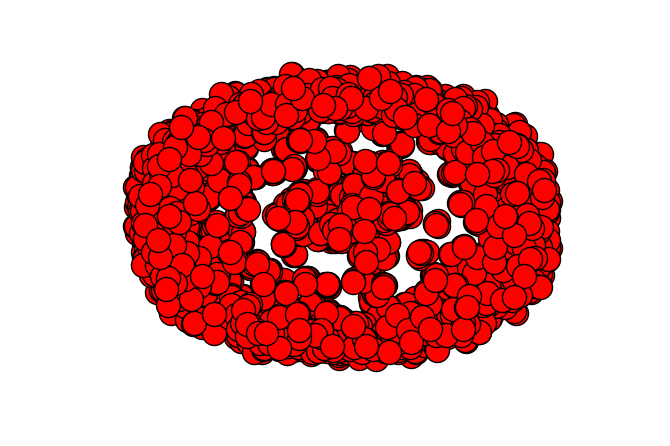

In [5]:
nx.draw(graph)
nx.info(graph)
plt.draw()

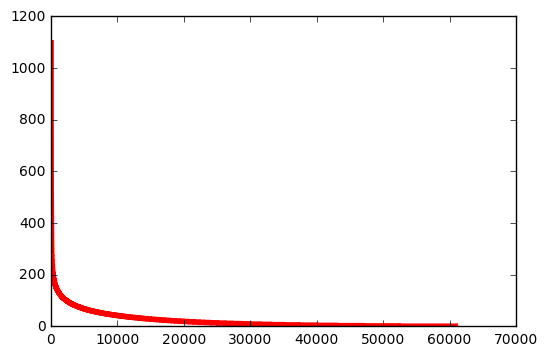

In [13]:
plt.plot(sorted(list(nx.degree(graph).values()),reverse=True),color="r",linewidth=4.0)

In [6]:
#Now i am going to calculate rate of interaction happened in activity network based on connection.
print(nx.info(graph))
print(nx.average_clustering(graph))
#plt.plot(sorted(list(nx.clustering(graph).values()),reverse=True))
#So here we can see average degree of activity network is 11.9522 and Average clustering coefficient is 0.1224 which is 
#very low means nodes are not tightly connected to each other. 

Name: 
Type: Graph
Number of nodes: 60867
Number of edges: 690070
Average degree:  22.6747
0.19752168254300925


In [81]:
#Here i am taking random nodes from dataframe
filter_connection_data_from1970=connection_data[connection_data['year']==1970]
df = filter_connection_data_from1970.sample(n=1000)#Taking 1000 records for sample
connection_array=[]
user_arr=[]

dest_array=[]
for i in df.index:
    _time=df.loc[i]["year"]
    dict={"source":df.loc[i]["Source"],"target":df.loc[i]["Target"],"period":_time}
    user_arr.append(df.loc[i]["Source"])
    dest_array.append(df.loc[i]["Target"])
    
    connection_array.append(dict)
#print(user_arr)
print(len(connection_array))

1000


In [82]:
_years_exist=[0,0,0,0,0]#This array will store count of interactions happend in corresponding years
def interaction_stack(source,target,time,cnt):
    #I am creating temporary dataframe which contains same columns as activity data.
    interaction_df = pandas.DataFrame(columns=['Source', 'Target', 'Timestamp',"year","month"]).astype(int)
    _tempdata=[]#I am storing filtered data based on source and target into this array.
    activity_data_filter=activity_data[activity_data["year"]>=1970] #Taking all data after connection established
    if len(activity_data_filter[(activity_data_filter['source']==source) & (activity_data_filter['Target']==target)])>0:
        data_new=activity_data_filter[(activity_data_filter['source']==source) & (activity_data_filter['Target']==target)]
        if len(data_new)>0:
            for i in data_new.index:
                _tempdata.append([data_new[n][i] for n in data_new])
    
            for i in range(len(_tempdata)):
                interaction_df.loc[i]=_tempdata[i]
            
            df_count=interaction_df.groupby('year').size().reset_index(name='count')
            if ((df_count["year"] == 1970)).any():
                _years_exist[0]=_years_exist[0]+1
            if ((df_count["year"] == 2006)).any():
                _years_exist[1]=_years_exist[1]+1
            if ((df_count["year"] == 2007)).any():
                _years_exist[2]=_years_exist[2]+1
            if ((df_count["year"] == 2008)).any():
                _years_exist[3]=_years_exist[3]+1
            if ((df_count["year"] == 2009)).any():
                _years_exist[4]=_years_exist[4]+1
            

for val in range(len(connection_array)):
    interaction_stack(connection_array[val]['source'],connection_array[val]['target'],connection_array[val]['period'],val)
print(_years_exist)

[97, 16, 51, 93, 4]


([<matplotlib.axis.XTick at 0x1f704d6de48>,
 <a list of 5 Text xticklabel objects>)

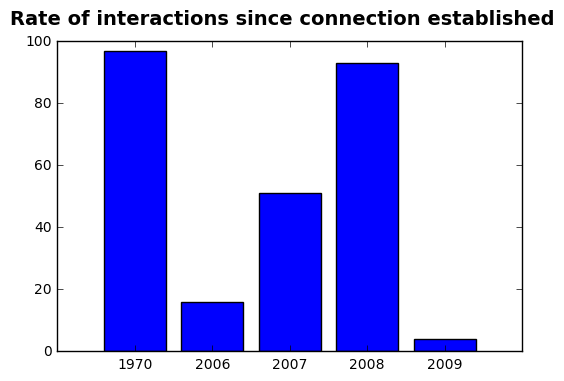

In [83]:
# Now lets plot it
%matplotlib inline
import matplotlib.pyplot as plt
num_of_wall_post_month=[1,2,3,4,5]
ticks=["1970","2006","2007","2008","2009"]
plt.figure().suptitle('Rate of interactions since connection established', fontsize=14, fontweight='bold')
plt.bar(num_of_wall_post_month, _years_exist,align='center')
plt.xticks(num_of_wall_post_month, ticks)